In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from geobr import read_state
import imageio
%matplotlib inline

<AxesSubplot:>

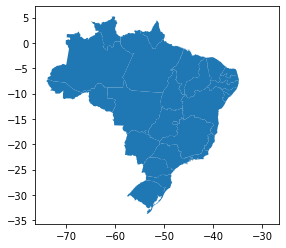

In [2]:
# Gerando shape do brasil dividido em estados com a biblioteca GEOBR
shape_br = read_state(code_state='all')
shape_br.plot()

In [8]:
shape_br

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ..."


In [39]:
# Seleciona em 'casos_full.csv' apenas os atributos que vamos trabalhar
data = pd.read_csv('caso_full.csv')

# Selecionar colunas
data_state = data.loc[data.place_type == 'state', ['state','epidemiological_week','new_confirmed']]

In [40]:
data_state = data_state.groupby(['state', 'epidemiological_week'], as_index= False).sum()
data_state

,state,epidemiological_week,new_confirmed
0,AC,12,11
1,AC,13,14
2,AC,14,21
3,AC,15,26
4,AC,16,70
...,...,...,...
666,TO,31,4667
667,TO,32,5229
668,TO,33,5326
669,TO,34,6607


In [41]:
# Cria a coluna com o poligono representante de cada estado e adiciona ela ao data_state
states = shape_br[['abbrev_state', 'geometry']]
data_state.reset_index(inplace=True)
data_state = data_state.merge(states, how='inner', left_on='state', right_on='abbrev_state')
data_state = data_state.drop(['index', 'abbrev_state'], axis=1)
data_state.reset_index(inplace=True)
data_state = data_state.drop(['index'], axis=1)
data_state

,state,epidemiological_week,new_confirmed,geometry
0,AC,12,11,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
1,AC,13,14,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,AC,14,21,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
3,AC,15,26,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
4,AC,16,70,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
...,...,...,...,...
666,TO,31,4667,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
667,TO,32,5229,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
668,TO,33,5326,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."
669,TO,34,6607,"MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ..."


In [ ]:
#Faz a plotagem dos mapas por semana epidemiológica 
for semana in range(9,32):
    semana_x = data_state[data_state.epidemiological_week == semana]
    
    #Fazendo o typecasting para GeoDataFrame
    semana_x = gpd.GeoDataFrame(semana_x)
    copy = gpd.GeoDataFrame(data_state)
    copy2 = shape_br
    copy2['coords'] = copy2['geometry'].apply(lambda x: x.representative_point().coords[:])
    copy2['coords'] = [coords[0] for coords in copy2['coords']]
    
    fig, ax = plt.subplots(figsize=(20, 15))
    semana_x.plot(column='new_confirmed', cmap='gist_heat_r', vmin=0.0, legend=True,legend_kwds={'label': f"(Em %)", 'orientation': "vertical"},vmax=data_state['new_confirmed'].max(), ax=ax)
    
    ax.annotate(f'Semana {semana}', xy=(0.1,.225),xycoords='figure fraction',horizontalalignment='left', verticalalignment='top',fontsize=35)
    copy.geometry.boundary.plot(color=None,edgecolor='#888888',linewidth = 0.1,ax=ax)
    ax.set_title(f"Incidencia COVID-19 por Unidade da Federação (em %)", fontdict={'fontsize':25})
    ax.axis('off')
    
    for i, j in copy2.iterrows():
        plt.annotate(s=j[1], xy=j['coords'], horizontalalignment='center', verticalalignment='center', fontsize=20)
    #plt.show()
    # Salva cada mapa como um chart
    chart = ax.get_figure()
    chart.savefig(f'semana_{semana}_incidencia.png', dpi=120)